In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
data = pd.read_csv(r'C:\Users\shrey\OneDrive\Desktop\train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data1=data.copy()

In [6]:
data1 = data1.drop(['Pclass', 'SibSp', 'Cabin', 'Name', 'Parch', 'Ticket'], axis=1, errors='ignore')

In [7]:
data1.head()

,PassengerId,Survived,Sex,Age,Fare,Embarked
0,1,0,male,22.0,7.2500,S
1,2,1,female,38.0,71.2833,C
2,3,1,female,26.0,7.9250,S
3,4,1,female,35.0,53.1000,S
4,5,0,male,35.0,8.0500,S


In [8]:
data1.describe()

,PassengerId,Survived,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,29.699118,32.204208
std,257.353842,0.486592,14.526497,49.693429
min,1.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,20.125000,7.910400
50%,446.000000,0.000000,28.000000,14.454200
75%,668.500000,1.000000,38.000000,31.000000
max,891.000000,1.000000,80.000000,512.329200


In [9]:
data1.dropna()
data1.drop_duplicates()

,PassengerId,Survived,Sex,Age,Fare,Embarked
0,1,0,male,22.0,7.2500,S
1,2,1,female,38.0,71.2833,C
2,3,1,female,26.0,7.9250,S
3,4,1,female,35.0,53.1000,S
4,5,0,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,887,0,male,27.0,13.0000,S
887,888,1,female,19.0,30.0000,S
888,889,0,female,NaN,23.4500,S
889,890,1,male,26.0,30.0000,C


In [10]:
data1.to_csv('processed_data.csv')

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


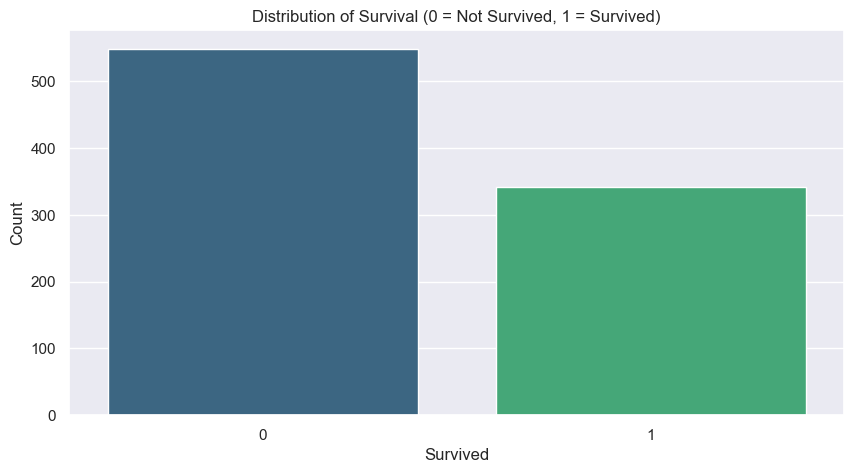

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', data=data1, palette="viridis",hue='Survived',legend=False)
plt.title("Distribution of Survival (0 = Not Survived, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

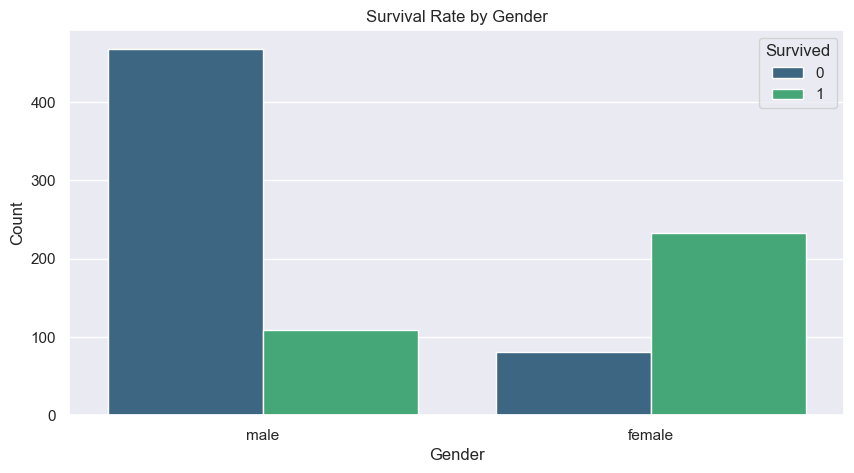

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Survived', data=data1, palette="viridis")
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

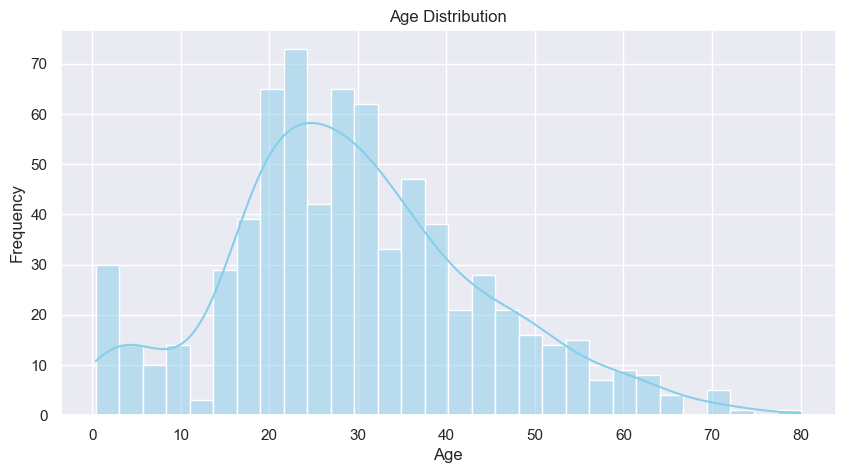

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data1['Age'], kde=True, bins=30, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

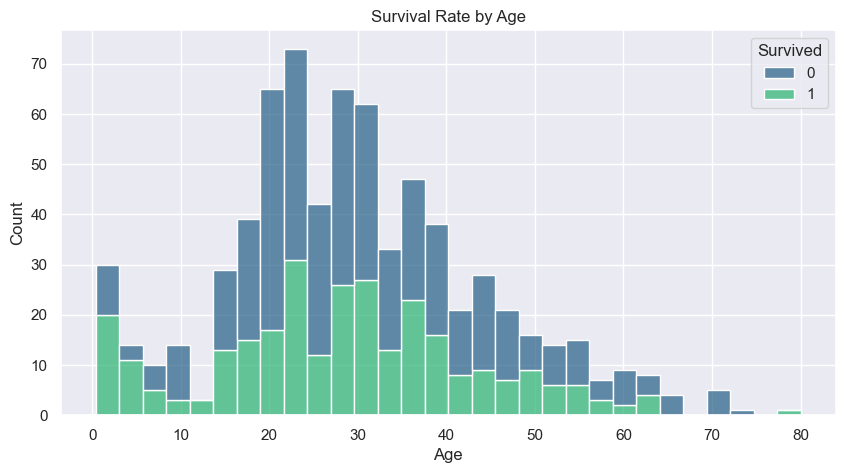

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data1, x="Age", hue="Survived", multiple="stack", bins=30, palette="viridis")
plt.title("Survival Rate by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

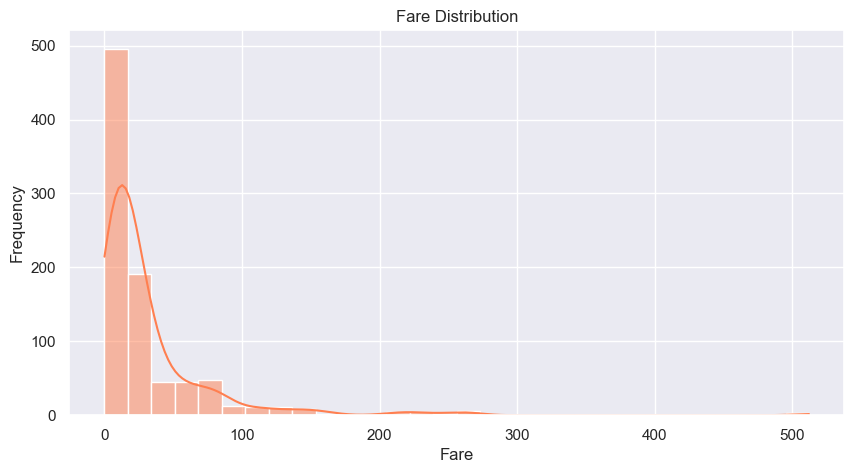

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(data1['Fare'], kde=True, bins=30, color="coral")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

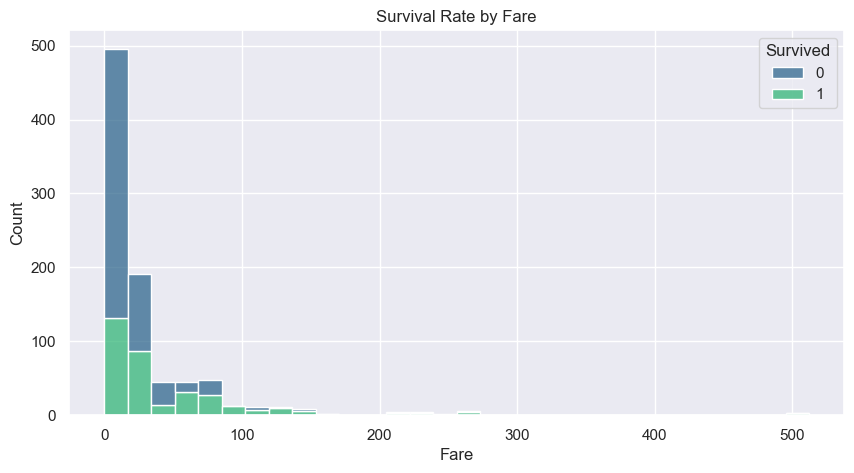

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data1, x="Fare", hue="Survived", multiple="stack", bins=30, palette="viridis")
plt.title("Survival Rate by Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

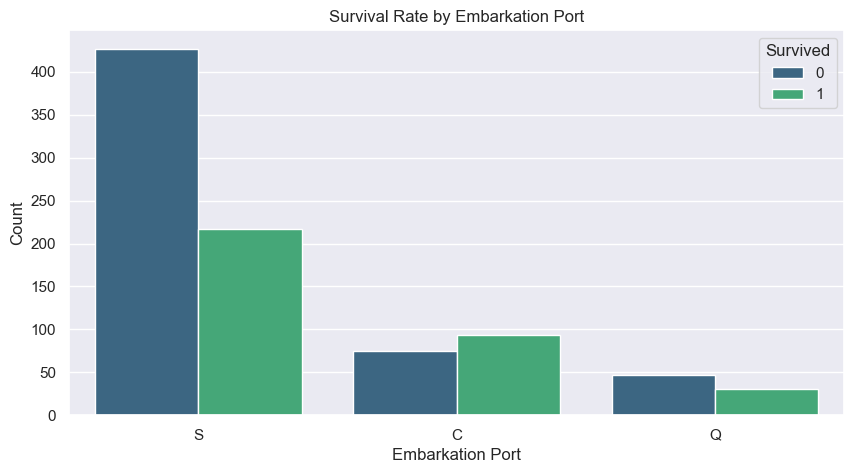

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', hue='Survived', data=data1, palette="viridis")
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Count")
plt.show()